## Example: Barcelona - Real Madrid 1-3 24/10/2020
In this example Barcelona and Real Madrid played their first game of the season for the La Liga Santander accumulating 1.1 and 3.3 xGoals each ([src](https://fbref.com/en/matches/9b07dcbc/El-Clasico-Barcelona-Real-Madrid-October-24-2020-La-Liga)). From their expected goals we gather the probabilities that they had to score 0,1,2,3 ... etc goals.

In [9]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
max_goals = 10

In [10]:
xGBarcelona = 1.1
xGReal = 3.3

In [11]:
gProbsBarcelona = [poisson.pmf(i,xGBarcelona) for i in range(max_goals)]
gProbsReal = [poisson.pmf(i,xGReal) for i in range(max_goals)]

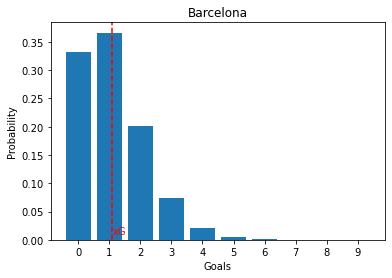

In [28]:
plt.bar(range(len(gProbsBarcelona)),gProbsBarcelona)
plt.xticks(range(len(gProbsBarcelona)))
plt.axvline(xGBarcelona,linestyle='--',color='red')
plt.text(xGBarcelona,0.01,'xG',color='red')
plt.xlabel('Goals')
plt.ylabel('Probability')
plt.title('Barcelona');

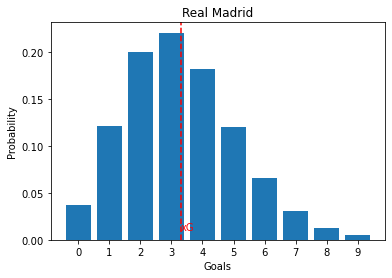

In [29]:
plt.bar(range(len(gProbsReal)),gProbsReal)
plt.xticks(range(len(gProbsReal)))
plt.axvline(xGReal,linestyle='--',color='red')
plt.text(xGReal,0.01,'xG',color='red')
plt.xlabel('Goals')
plt.ylabel('Probability')
plt.title('Real Madrid');

From this we can now calculate the probabilities of all the possible results.

In [31]:
resultProbs = np.matmul(np.array(gProbsBarcelona).reshape(max_goals,1),np.array(gProbsReal).reshape(1,max_goals))

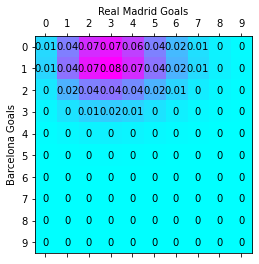

In [53]:
fig, ax = plt.subplots()

ax.matshow(resultProbs,cmap='cool')
plt.xticks(range(max_goals))
plt.yticks(range(max_goals))
plt.xlabel('Real Madrid Goals')
plt.ylabel('Barcelona Goals')
ax.xaxis.set_label_position('top') 

for i in range(max_goals):
    for j in range(max_goals):
        c = resultProbs[j,i]
    
        ax.text(i, j, "{:0.2f}".format(c), va='center', ha='center') if c > 0.01 else ax.text(i, j, "0", va='center', ha='center')

In the Result Probabilites matrix the sum of the diagonal elements (Barcelona goals = Real Madrid goals) gives us the probability of a draw. Similarly the sum of the elements above the diagonal (Real Madrid goals > Barcelona goals) gives us the probability of a Real Madrid win and the sum of the elements below the diagonal (Real Madrid goals < Barcelona goals) gives us the probability of a Barcelona win.

In [62]:
barcelonaWP = np.tril(resultProbs).sum()-np.trace(resultProbs)
realWP = np.triu(resultProbs).sum()-np.trace(resultProbs)
drawP = np.trace(resultProbs)
print("Barcelona win %: {:.2f}".format(barcelonaWP))
print("Draw %: {:.2f}".format(drawP))
print("Real Madrid win %: {:.2f}".format(realWP))

Barcelona win %: 0.09
Draw %: 0.12
Real Madrid win %: 0.79


Now that we have the probabilities for the results we can calculate the expected points for each team as follows: ${xPoints = winProb\times3 + drawProb\times1}$

In [64]:
barcelonaXP = 3*barcelonaWP+1*drawP
realXP = 3*realWP+1*drawP
print("Barcelona expected points: {:.2f}".format(barcelonaXP))
print("Real Madrid expected points: {:.2f}".format(realXP))

Barcelona expected points: 0.38
Real Madrid expected points: 2.49
